<a href="https://colab.research.google.com/github/julianacholder/ai-powered-ats-summative/blob/main/Summative_Intro_to_ml_%5BJuliana_C_Holder%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
#Import Necessary Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers




In [ ]:
# Directory for saved models
os.makedirs('saved_models', exist_ok=True)

# **AI-Powered Applicant Tracking System (ATS)**

 **Problem Statement:**

Applicant Tracking Systems (ATS) are essential for modern recruitment but often miss critical factors like cultural fit and genuine potential, resulting in overlooked talent. Despite handling large volumes of resumes, many ATS platforms still face issues like resume overload and inefficient matching. While AI and machine learning promise better assessment and job matching, current solutions can struggle with intangible qualities and nuanced candidate attributes.

This project proposes a lightweight ATS that uses TF-IDF for feature extraction and Logistic Regression algorithms for classification. By enhancing contextual understanding and providing actionable feedback to job seekers, it aims to improve accuracy and fairness in matching resumes to job descriptions, which will benefit both employers and applicants.

**Data Description:**

This dataset from kaggle serves as a comprehensive resource for resume parsing, candidate profiling, and job matching applications. It includes structured information on career objectives, skills, education, work experience, certifications, and other relevant details.

Link to dataset: https://www.kaggle.com/datasets/saugataroyarghya/resume-dataset/data







In [ ]:

#Load and Explore the Dataset

# For this classifier-based approach, each row is a (resume, job) pair.
# We have columns like 'career_objective', 'skills' for the resume, and
# 'job_position_name', 'educationaL_requirements', 'experiencere_requirement', etc. for the job.
# 'matched_score' is used to label each row as relevant (1) if >= 0.7, else not relevant (0).

df = pd.read_csv('resume_data.csv')
print("Dataset sample:")
print(df.head())




Dataset sample:
  address                                   career_objective  \
0     NaN  Big data analytics working and database wareho...   
1     NaN  Fresher looking to join as a data analyst and ...   
2     NaN                                                NaN   
3     NaN  To obtain a position in a fast-paced business ...   
4     NaN  Professional accountant with an outstanding wo...   

                                              skills  \
0  ['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...   
1  ['Data Analysis', 'Data Analytics', 'Business ...   
2  ['Software Development', 'Machine Learning', '...   
3  ['accounts payables', 'accounts receivables', ...   
4  ['Analytical reasoning', 'Compliance testing k...   

                        educational_institution_name  \
0  ['The Amity School of Engineering & Technology...   
1  ['Delhi University - Hansraj College', 'Delhi ...   
2    ['Birla Institute of Technology (BIT), Ranchi']   
3  ['Martinez Adult Education, Busines

In [ ]:
print("\nColumns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['address', 'career_objective', 'skills', 'educational_institution_name', 'degree_names', 'passing_years', 'educational_results', 'result_types', 'major_field_of_studies', 'professional_company_names', 'company_urls', 'start_dates', 'end_dates', 'related_skils_in_job', 'positions', 'locations', 'responsibilities', 'extra_curricular_activity_types', 'extra_curricular_organization_names', 'extra_curricular_organization_links', 'role_positions', 'languages', 'proficiency_levels', 'certification_providers', 'certification_skills', 'online_links', 'issue_dates', 'expiry_dates', '\ufeffjob_position_name', 'educationaL_requirements', 'experiencere_requirement', 'age_requirement', 'responsibilities.1', 'skills_required', 'matched_score']


In [ ]:
# Combined resume fields into 'resume_text' and job fields into 'job_text'.

# resume fields:
df['resume_text'] = (
    df['career_objective'].fillna('') + " " +
    df['skills'].fillna('') + " " +
    df['degree_names'].fillna('') + " " +
    df['positions'].fillna('') + " " +
    df['responsibilities'].fillna('')
)

# job fields:
df['job_text'] = (
    df['\ufeffjob_position_name'].fillna('') + " " +
    df['educationaL_requirements'].fillna('') + " " +
    df['experiencere_requirement'].fillna('') + " " +
    df['responsibilities.1'].fillna('') + " " +
    df['skills_required'].fillna('')
)

# Combine the two texts for classifier input, separated by a special token [SEP].
df['combined'] = df['resume_text'] + " [SEP] " + df['job_text']

# Create the binary label: relevant if matched_score >= 0.7, else not relevant.
df['job_match'] = (df['matched_score'].astype(float) >= 0.7).astype(int)

print("\nLabel distribution (1 = relevant, 0 = not relevant):")
print(df['job_match'].value_counts())


Label distribution (1 = relevant, 0 = not relevant):
job_match
0    5075
1    4469
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess with TF-IDF
# Used the combined text for classification, and 'job_match' as the label.

tfidf = TfidfVectorizer(stop_words='english')
X_features = tfidf.fit_transform(df['combined']).toarray()
y = df['job_match'].values

In [ ]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)

# Split data into train (60%), validation (20%), and test (20%).

X_train, X_temp, y_train, y_temp = train_test_split(X_features, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nData shapes -> Train: {}, Validation: {}, Test: {}".format(X_train.shape, X_val.shape, X_test.shape))


Data shapes -> Train: (5726, 3318), Validation: (1909, 3318), Test: (1909, 3318)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
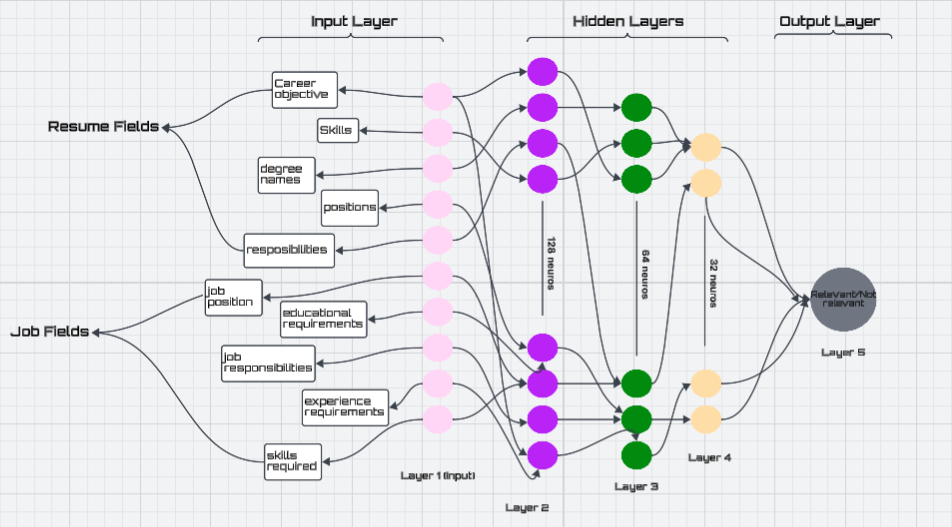




#Task: Define a function that creates models without and With specified Optimization techniques


Best Logistic Regression Parameters: {'C': 10}

Logistic Regression Metrics:
Accuracy: 0.77
F1 Score: 0.75
Precision: 0.75
Recall: 0.75


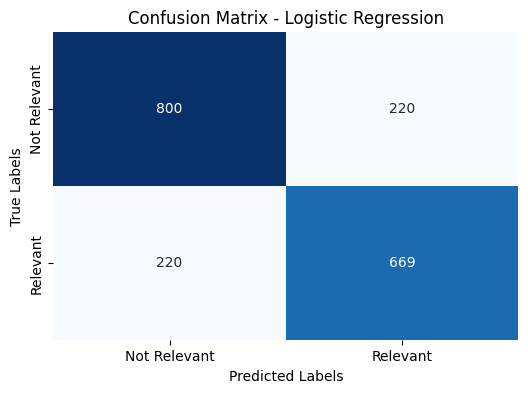

['saved_models/logistic_regression.pkl']

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Classical ML Model: Logistic Regression
param_grid = {'C': [0.1, 1, 10]}
lr = LogisticRegression(max_iter=1000)
grid_lr = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_lr.best_params_)

# Evaluate on the test set
y_pred_lr = best_lr.predict(X_test)

# Convert continuous values to binary classifications using a threshold
threshold = 0.7
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred_lr >= threshold).astype(int)

# Calculate metrics
acc_lr = accuracy_score(y_test_binary, y_pred_binary)
f1_lr = f1_score(y_test_binary, y_pred_binary)
precision_lr = precision_score(y_test_binary, y_pred_binary)
recall_lr = recall_score(y_test_binary, y_pred_binary)

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {acc_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")


labels = ['Not Relevant', 'Relevant']

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Save model
joblib.dump(best_lr, 'saved_models/logistic_regression.pkl')



In [74]:

def define_model(optimization: str,
                 regularization_datatype: float,
                 early_stopping_flag: bool,
                 dropout_rate: float,
                 learning_rate: float):
    """
    Define a neural network model with different optimization techniques.
    Includes an option for a simple NN (no optimization),
    and a deeper architecture for advanced models.
    """

    # Simple NN without any optimization or regularization
    if (optimization is None and
        regularization_datatype is None and
        not early_stopping_flag and
        dropout_rate == 0):

        model = Sequential([
            Input(shape=(X_train.shape[1],)),
            Dense(max(1, X_train.shape[1] // 2), activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    else:
        model = Sequential()
        reg = l2(regularization_datatype) if regularization_datatype else None

        # Input layer
        model.add(Input(shape=(X_train.shape[1],)))

        # First hidden layer
        model.add(Dense(128, activation='relu', kernel_regularizer=reg))

        # Optional dropout
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

        # Second hidden layer
        model.add(Dense(64, activation='relu', kernel_regularizer=reg))


        # Third hidden layer
        model.add(Dense(32, activation='relu', kernel_regularizer=reg))

        # Optional dropout
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Optimizer selection
        if optimization is None or optimization.lower() == 'adam':
            opt = Adam(learning_rate=learning_rate)
        elif optimization.lower() == 'rmsprop':
            opt = RMSprop(learning_rate=learning_rate)
        elif optimization.lower() == 'sgd':
            opt = SGD(learning_rate=learning_rate, momentum=0.9)
        else:
            opt = Adam(learning_rate=learning_rate)

        model.compile(optimizer=opt,
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

    return model


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [88]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

def calculate_metrics(model, model_number, X_test, y_test):
    """
    Calculate and print performance metrics for a model,
    and plot the confusion matrix with custom labels.
    """
    # Predict probabilities and convert to binary predictions
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype("int32")

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"\nModel {model_number} Metrics:")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    print("\nConfusion Matrix:")
    print(cm)

    # Define custom labels for the axes
    labels = ['Not Relevant', 'Relevant']

    # Plot the confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - Model {model_number}")
    plt.show()

    return acc, f1, precision, recall


In [89]:

def loss_curve_plot(history, model_name='Model'):
    """
    Plot training and validation loss and accuracy curves
    """
    plt.figure(figsize=(12, 5))

    # Loss Subplot
    plt.subplot(1, 2, 1)
    epochs_range = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs_range, history.history['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs_range, history.history['val_loss'], 'ro-', label='Validation Loss')
    plt.title(f'{model_name} - Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Subplot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history.history['accuracy'], 'bo-', label='Training Accuracy')
    plt.plot(epochs_range, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Training Simple NN (No optimization)
Epoch 1/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 57s 75ms/step - accuracy: 0.7124 - loss: 0.5511 - val_accuracy: 0.8020 - val_loss: 0.4226
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 76s 67ms/step - accuracy: 0.8318 - loss: 0.3693 - val_accuracy: 0.8041 - val_loss: 0.4151
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.8575 - loss: 0.3150 - val_accuracy: 0.8067 - val_loss: 0.3991
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8952 - loss: 0.2531 - val_accuracy: 0.8214 - val_loss: 0.4145
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 84s 68ms/step - accuracy: 0.9242 - loss: 0.1931 - val_accuracy: 0.8172 - val_loss: 0.4281
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.9484 - loss: 0.1422 - val_accuracy: 0.8177 - val_loss: 0.4861
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 83s 69ms/step - accuracy: 0.9623 - loss: 0.1093 - val_accuracy: 0.8114 - val_loss: 0.5288
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step

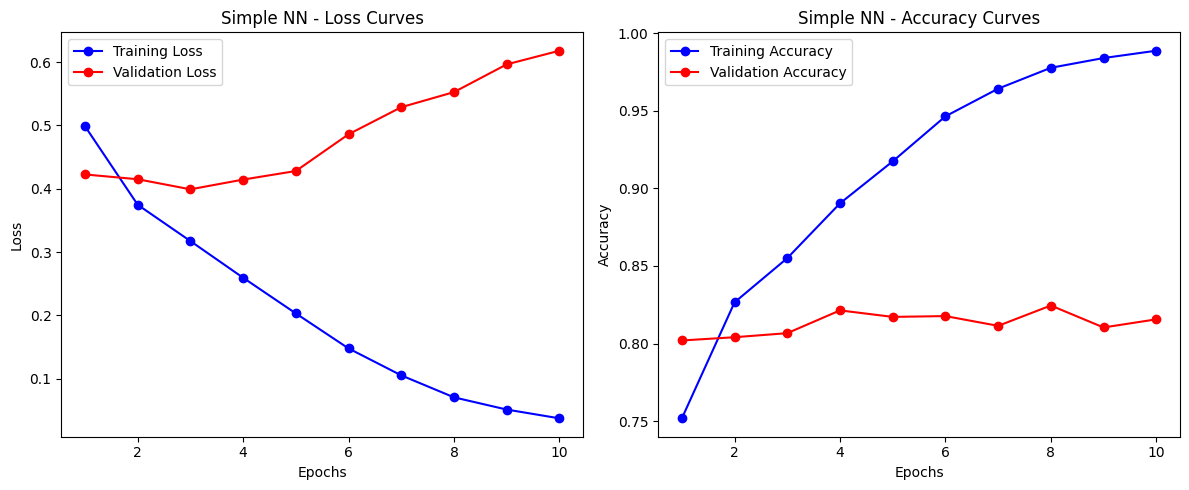

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Model Simple Metrics:
Accuracy: 0.82
F1 Score: 0.81
Precision: 0.80
Recall: 0.81

Confusion Matrix:
[[843 177]
 [167 722]]


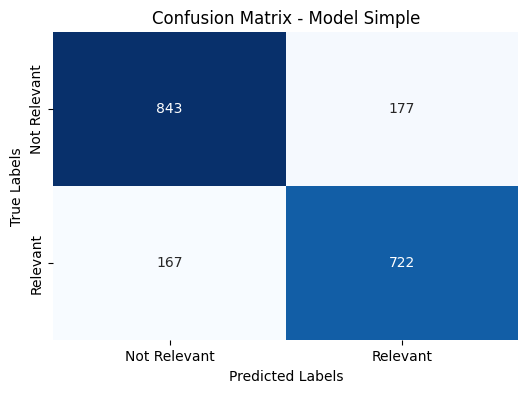

In [90]:
# 1. Simple NN without optimization
print("Training Simple NN (No optimization)")
simple_model = define_model(None, None, False, 0, 0)
history_simple = simple_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=8,
    validation_data=(X_val, y_val),
    verbose=1
)
loss_curve_plot(history_simple, 'Simple NN')
metrics_simple = calculate_metrics(simple_model, "Simple", X_test, y_test)

simple_model.save('saved_models/simple_nn_model.keras')


Training Model 2 (Adam Optimizer)
Epoch 1/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6987 - loss: 0.5702 - val_accuracy: 0.7878 - val_loss: 0.4210
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8165 - loss: 0.4015 - val_accuracy: 0.8083 - val_loss: 0.4446
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8519 - loss: 0.3274 - val_accuracy: 0.8020 - val_loss: 0.4164
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8753 - loss: 0.2751 - val_accuracy: 0.8156 - val_loss: 0.4398
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9087 - loss: 0.2144 - val_accuracy: 0.8208 - val_loss: 0.4476
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9265 - loss: 0.1797 - val_accuracy: 0.8193 - val_loss: 0.5203
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9534 - loss: 0.1144 - val_accuracy: 0.8083 - val_loss: 0.5344
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.95

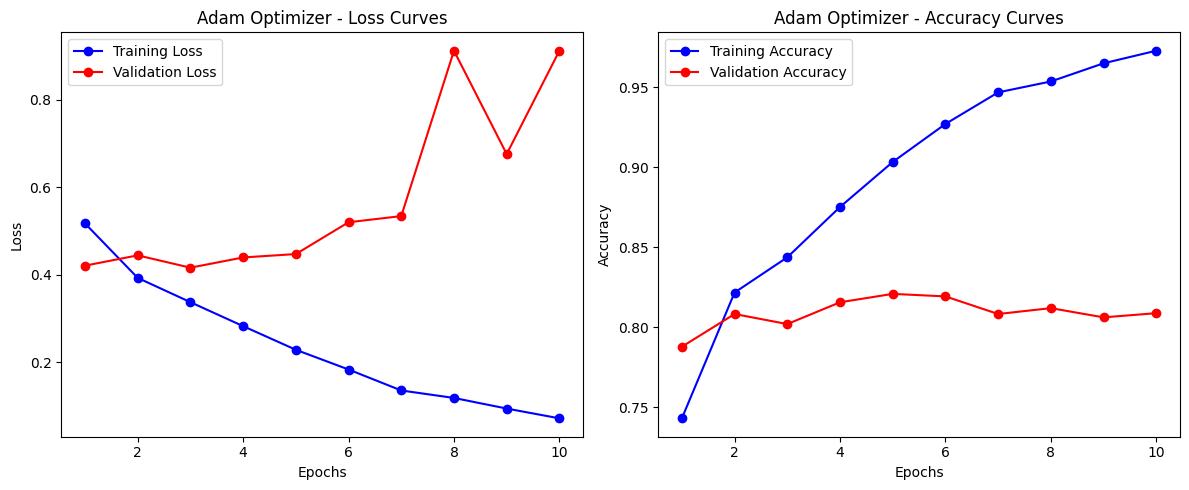

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Model 2 Metrics:
Accuracy: 0.82
F1 Score: 0.80
Precision: 0.81
Recall: 0.79

Confusion Matrix:
[[861 159]
 [189 700]]


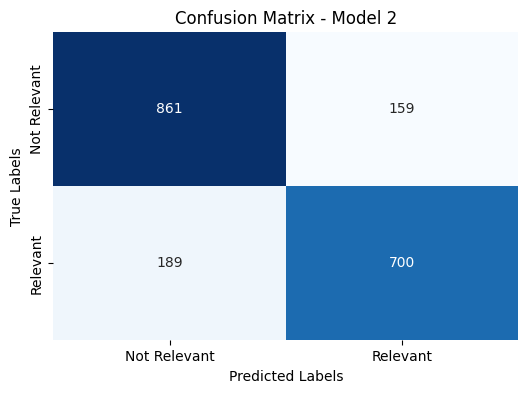

In [91]:
# 2. Model with Adam Optimizer
print("\nTraining Model 2 (Adam Optimizer)")
model_2 = define_model('adam', None, True, 0.0, 0.01)
history_2 = model_2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=8,
    validation_data=(X_val, y_val),
    verbose=1
)
loss_curve_plot(history_2, 'Adam Optimizer')
metrics_2 = calculate_metrics(model_2, 2, X_test, y_test)
model_2.save('saved_models/optimized_adam.keras')


Training Model 3 (RMSprop with Optimization)
Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5603 - loss: 1.8834 - val_accuracy: 0.5804 - val_loss: 0.7084
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6002 - loss: 0.6991 - val_accuracy: 0.6789 - val_loss: 0.6793
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6773 - loss: 0.6847 - val_accuracy: 0.7213 - val_loss: 0.6537
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6958 - loss: 0.6764 - val_accuracy: 0.7203 - val_loss: 0.6489
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7096 - loss: 0.6615 - val_accuracy: 0.7307 - val_loss: 0.6394
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6919 - loss: 0.6602 - val_accuracy: 0.7376 - val_loss: 0.6304
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6948 - loss: 0.6605 - val_accuracy: 0.7423 - val_loss: 0.6288
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - a

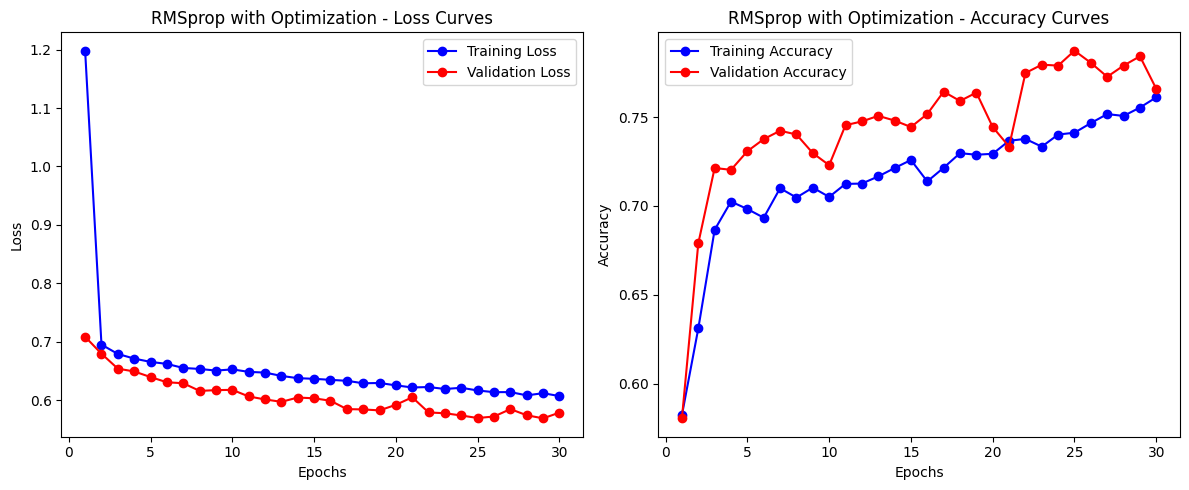

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Model 3 Metrics:
Accuracy: 0.76
F1 Score: 0.76
Precision: 0.71
Recall: 0.82

Confusion Matrix:
[[728 292]
 [159 730]]


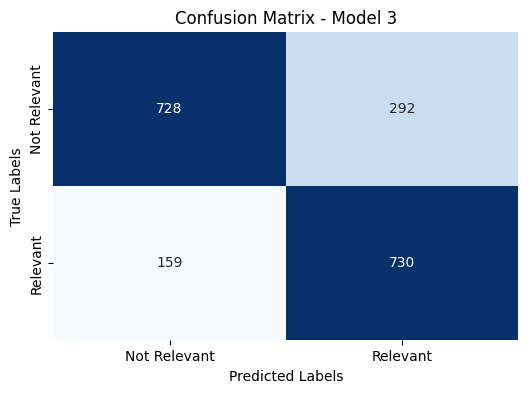

In [93]:
# 3. Model with RMSprop with Optimization
print("\nTraining Model 3 (RMSprop with Optimization)")
model_3 = define_model('rmsprop', 0.01, True, 0.4, 0.001)

# Enhanced early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    min_delta=0.001
)

history_3 = model_3.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)
loss_curve_plot(history_3, 'RMSprop with Optimization')
metrics_3 = calculate_metrics(model_3, 3, X_test, y_test)
model_3.save('saved_models/RMSprop_model.keras')

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5230 - loss: 2.4330 - val_accuracy: 0.5406 - val_loss: 2.0154 - learning_rate: 0.0100
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5376 - loss: 1.9056 - val_accuracy: 0.5406 - val_loss: 1.6068 - learning_rate: 0.0100
Epoch 3/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5791 - loss: 1.5317 - val_accuracy: 0.6522 - val_loss: 1.3092 - learning_rate: 0.0100
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6634 - loss: 1.2512 - val_accuracy: 0.7150 - val_loss: 1.0623 - learning_rate: 0.0100
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6897 - loss: 1.0338 - val_accuracy: 0.7323 - val_loss: 0.8941 - learning_rate: 0.0100
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6959 - loss: 0.9037 - val_accuracy: 0.7260 - val_loss: 0.7911 - learning_rate: 0.0100
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7160 - loss: 0.8004 

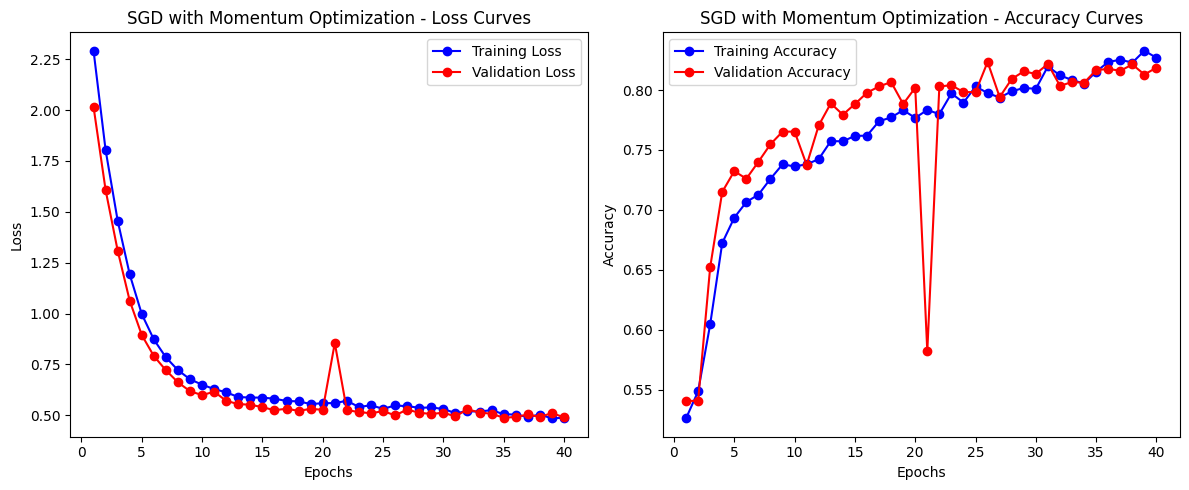

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Model 4 Metrics:
Accuracy: 0.82
F1 Score: 0.81
Precision: 0.79
Recall: 0.83

Confusion Matrix:
[[822 198]
 [151 738]]


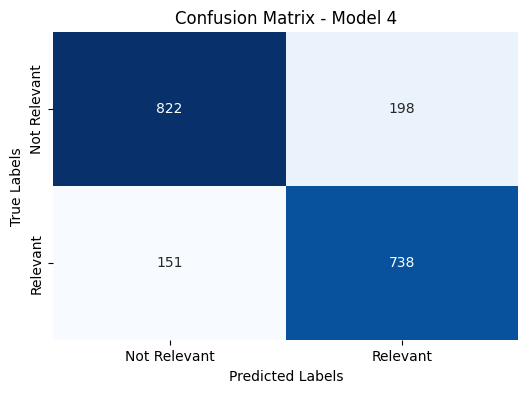

In [95]:
# 4: Model with SGD Optimizer with Momentum
model_4 = define_model('sgd', 0.005, True, 0.4, 0.01)
lr_scheduler_sgd = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.7,
    patience=3,
    min_lr=1e-4
)
early_stopping_sgd = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
history_4_sgd = model_4.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_sgd, lr_scheduler_sgd],
    verbose=1
)
loss_curve_plot(history_4_sgd, 'SGD with Momentum Optimization')
metrics_4_sgd = calculate_metrics(model_4, 4, X_test, y_test)
model_4.save('saved_models/SDG_momentum_model.keras')

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [82]:
# Save and Load the Best Model and Make Predictions
best_model = model_4
best_model_path = 'saved_models/best_optimized_model.keras'
best_model.save(best_model_path)

def make_predictions(model_path, X, y):
    """
    Loads a saved model and returns binary predictions (0 or 1) for input X.
    Also calculates loss.
    """
    model = load_model(model_path)
    predictions_prob = model.predict(X)
    predictions = (predictions_prob > 0.5).astype("int32")

    # Calculate loss
    loss = model.evaluate(X, y, verbose=0)[0]

    # Convert predictions to labels
    labeled_predictions = ['Relevant' if pred == 1 else 'Not Relevant' for pred in predictions]

    return predictions, labeled_predictions, loss

# Use the best model to make predictions on the test set
predictions_numerical, predictions_labeled, test_loss = make_predictions(best_model_path, X_test, y_test)

print("\nSample Predictions from the best model:")
for pred in predictions_labeled[:5]:
    print(pred)

# Evaluate the best model on the test set
cm_best = confusion_matrix(y_test, predictions_numerical)
f1_best = f1_score(y_test, predictions_numerical)
acc_best = accuracy_score(y_test, predictions_numerical)

print("\nBest Model Evaluation (Model 4):")
print("Confusion Matrix:\n", cm_best)
print("F1 Score: {:.2f}".format(f1_best))
print("Accuracy: {:.2f}".format(acc_best))
print("Test Loss: {:.4f}".format(test_loss))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Sample Predictions from the best model:
Relevant
Not Relevant
Relevant
Relevant
Not Relevant

Best Model Evaluation (Model 4):
Confusion Matrix:
 [[837 183]
 [165 724]]
F1 Score: 0.81
Accuracy: 0.82
Test Loss: 0.5127


Congratulations!!
